Stack Overflow Questions I've posted on this topic

https://stackoverflow.com/questions/64580500/compare-the-similarity-of-2-sounds-using-python-librosa

https://stackoverflow.com/questions/65247230/plot-the-timeframe-of-each-unique-sound-loop-in-a-song-with-rows-sorted-by-soun

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

from os import path
from typing import List

I created a class to record features of the sound files, feel free to use or not use these features

In [2]:
class Spec:
    name: str = ''
    sr: int = 44100

class MFCC(Spec):
    
    mfcc: np.ndarray # Mel-frequency cepstral coefficient
    delta_mfcc: np.ndarray # delta Mel-frequency cepstral coefficient
    delta2_mfcc: np.ndarray # delta2 Mel-frequency cepstral coefficient
    n_mfcc: int = 13

    def __init__(self, soundFile: str):
        self.name = path.basename(soundFile)
        y, sr = librosa.load(soundFile, sr=self.sr)
        self.mfcc = librosa.feature.mfcc(y, n_mfcc=self.n_mfcc, sr=sr)
        self.delta_mfcc = librosa.feature.delta(self.mfcc, mode="nearest")
        self.delta2_mfcc = librosa.feature.delta(self.mfcc, mode="nearest", order=2)

In [3]:
def get_mfccs(sound_files: List[str]) -> List[MFCC]:
    '''
        :param sound_files: Each item is a path to a sound file (wav, mp3, ...)
    '''
    mfccs = [MFCC(sound_file) for sound_file in sound_files]        
    return mfccs

In [4]:
def draw_specs(specList: List[Spec], attribute: str, title: str):
    '''
        Takes a list of same type audio features, and draws a spectrogram for each one
    '''
    def draw_spec(spec: Spec, attribute: str, fig: any, ax: any):
        img = librosa.display.specshow(
            librosa.amplitude_to_db(getattr(spec, attribute), ref=np.max),
            y_axis='log',
            x_axis='time',
            ax=ax
        )
        ax.set_title(title + str(spec.name))
        fig.colorbar(img, ax=ax, format="%+2.0f dB")

    for spec in range(0, len(specList), 3):
        
        fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
        draw_spec(specList[spec], attribute, fig, ax1)
        
        if (spec+1 < len(specList)):
            draw_spec(specList[spec+1], attribute, fig, ax2)
        
        if (spec+2 < len(specList)):
            draw_spec(specList[spec+2], attribute, fig, ax3)


These sound files are all the same length. Starting from a simple sign wave, each sound file is different than the one before it because it has one effect added to it (distortion, reverb, chorus, High frequency filter, an LFO modulating the volume, ...). The order that these sounds should be sorted is obvious because each sound is the exact same sound as the previous sound, but with one effect added. You can listen to all the sound files in sequence at `assets/sound-files/full_clip_1.wav`

In [5]:
sound_files_1 = [
    '../assets/transients_1/4.wav',
    '../assets/transients_1/6.wav',
    '../assets/transients_1/1.wav',
    '../assets/transients_1/11.wav',
    '../assets/transients_1/13.wav',
    '../assets/transients_1/9.wav',
    '../assets/transients_1/3.wav',
    '../assets/transients_1/7.wav',
    '../assets/transients_1/12.wav',
    '../assets/transients_1/2.wav',
    '../assets/transients_1/5.wav',
    '../assets/transients_1/10.wav',
    '../assets/transients_1/8.wav'
]
mfccs_1 = get_mfccs(sound_files_1)

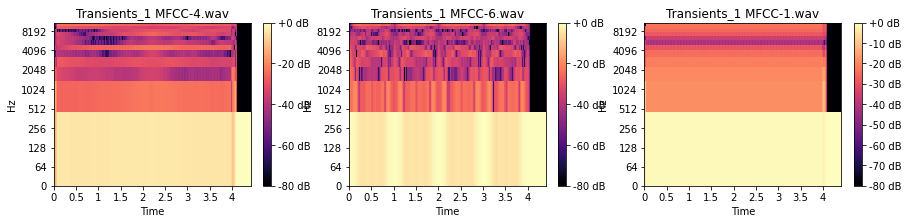

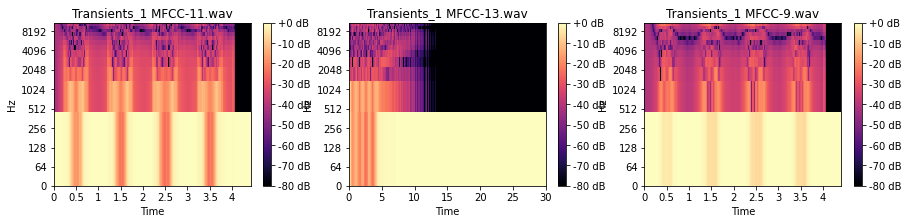

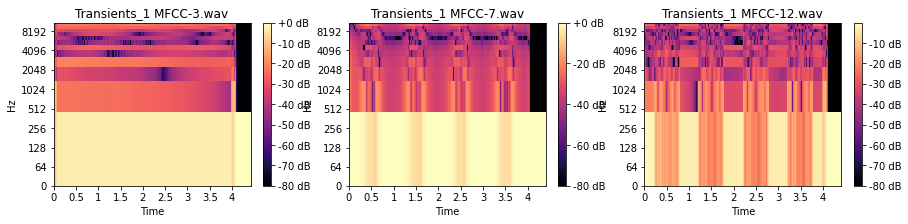

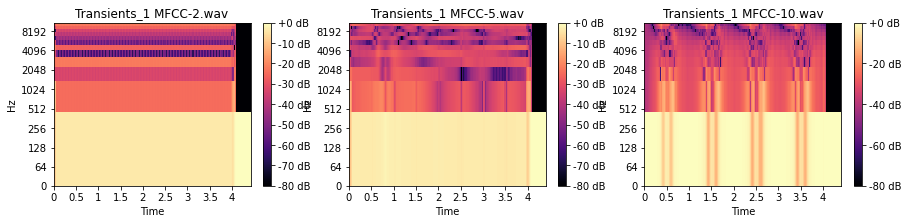

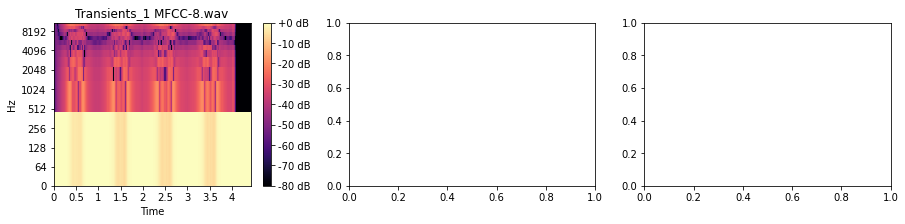

In [6]:
draw_specs(mfccs_1, 'mfcc', "Transients_1 MFCC-")

**Here the sound files are sorted numerically by the name of the sound file. Change this sorting method so that the sound files are sorted based on the sound.**

In [7]:
def sort_sound_files(sound_files: List[str]):
    # TODO: Complete this function. The soundfiles must be sorted based on the content in the file, do not use the name of the file
    
    # This is the correct order that the sounds should be sorted in
    return [f"../assets/transients_1/{num}.wav" for num in range(1,14)] # TODO: remove(or comment) once method is completed

In [8]:
sorted_sound_files_1 = sort_sound_files(sound_files_1)
mfccs_1 = get_mfccs(sorted_sound_files_1)

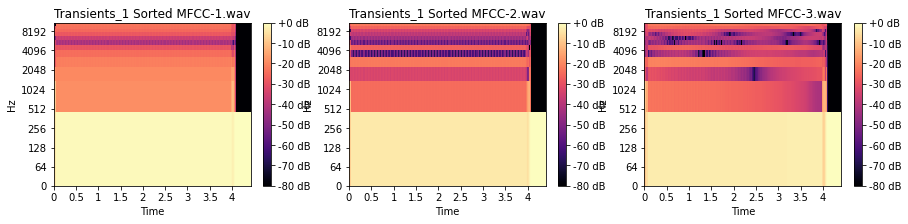

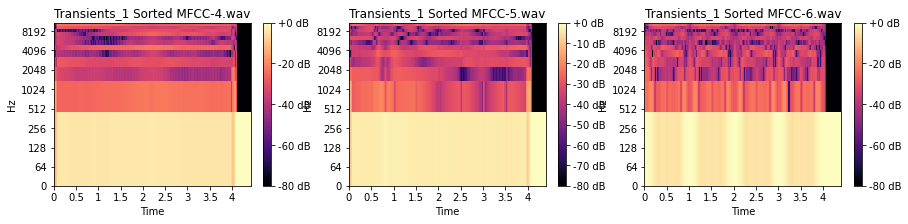

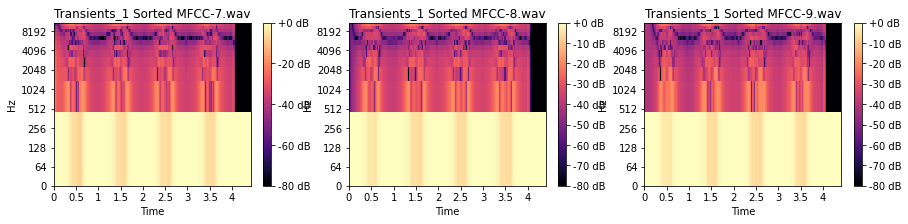

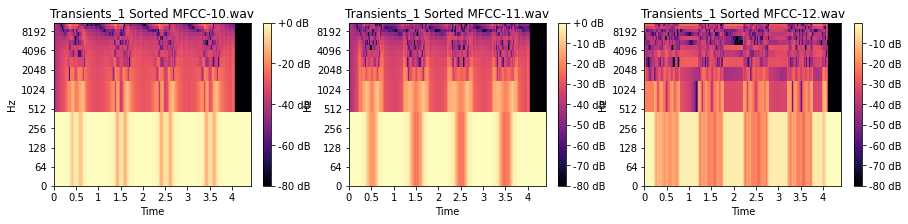

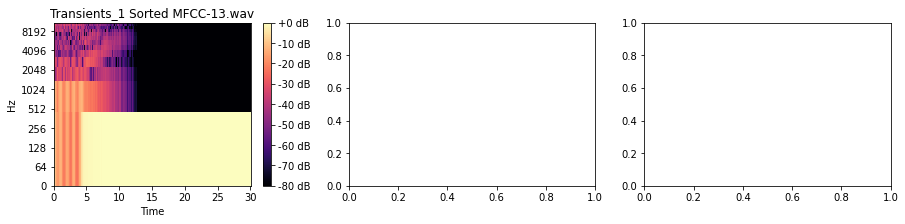

In [9]:
draw_specs(mfccs_1, 'mfcc', "Transients_1 Sorted MFCC-")

Here are another group of sound files from an actual song, you can listen to the full song clip at `assets/sound-files/full_clip_2.wav`. I have broken this clip up into individual sounds based on transients, and created individual sound files.

**It would be nice if you could figure out what this warning is about also, and write down an explanation**

```
UserWarning: n_fft=2048 is too small for input signal of length=1536
  warnings.warn(
```

In [10]:
sound_files_2 = [f"../assets/transients_2/{num}.wav" for num in range(0, 40)]
mfccs_2 = get_mfccs(sound_files_2)

/Users/sam/.pyenv/versions/3.9.5/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1536
  warnings.warn(


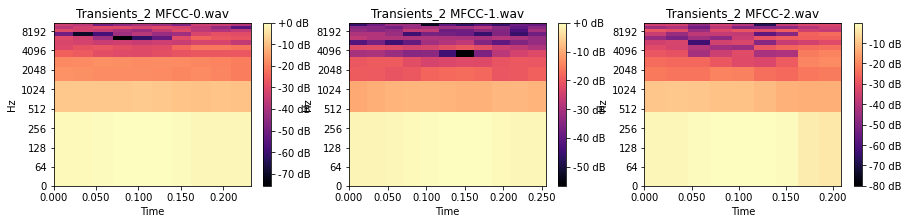

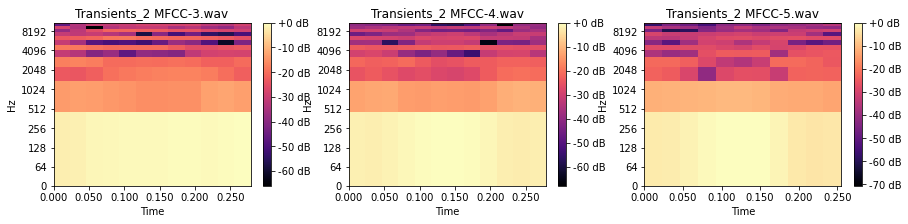

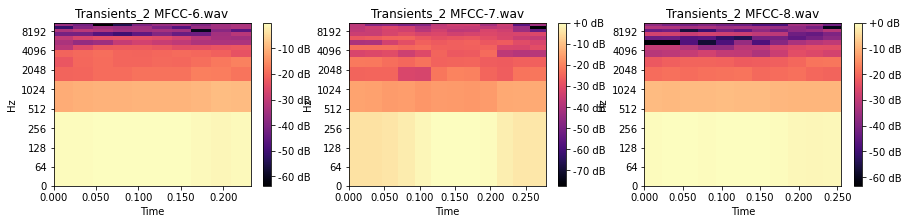

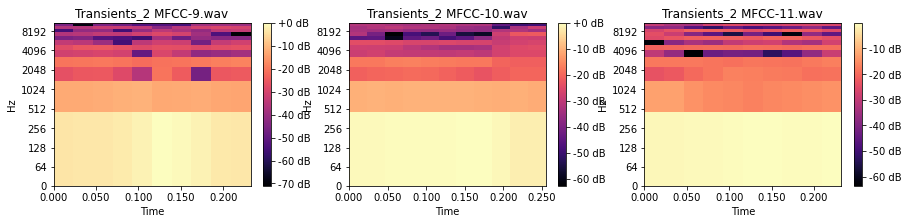

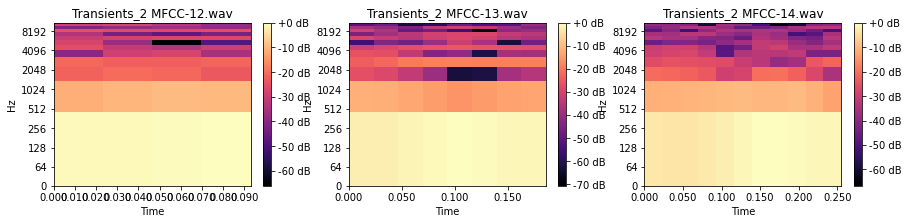

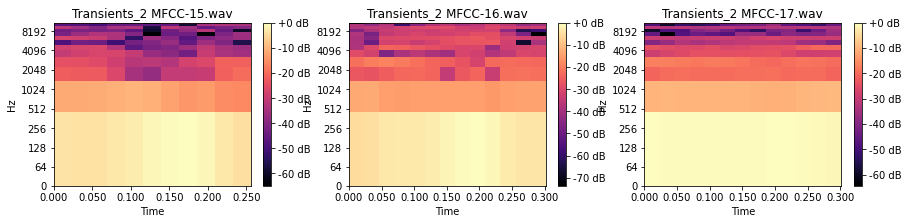

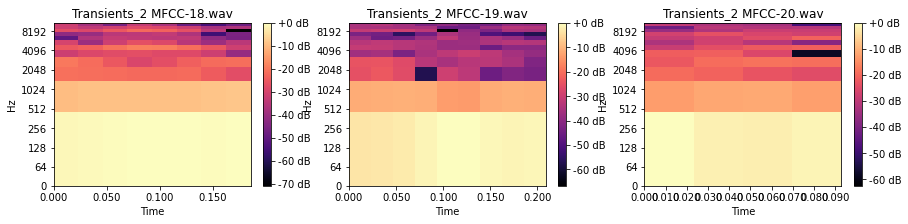

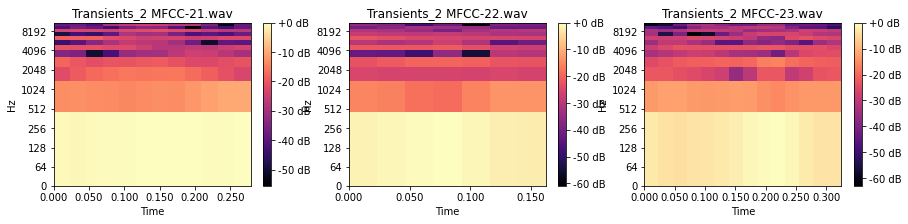

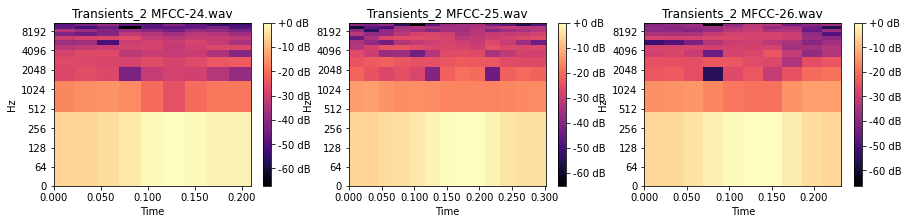

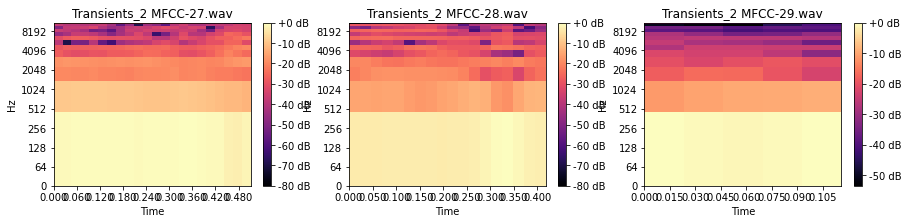

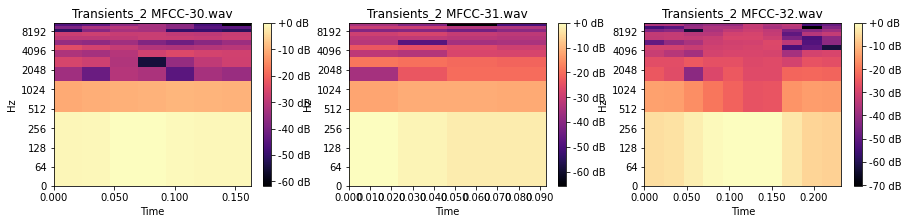

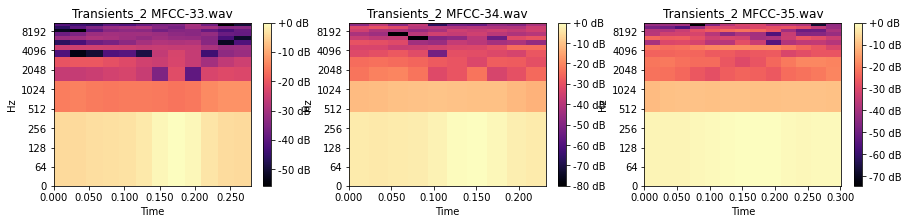

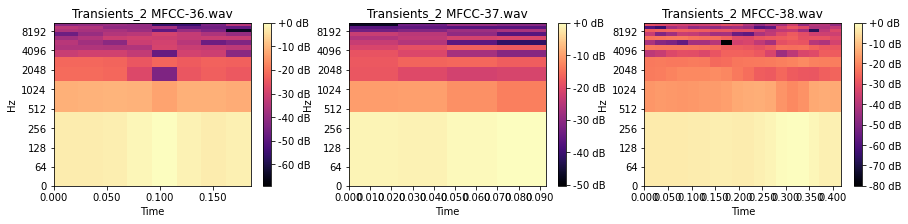

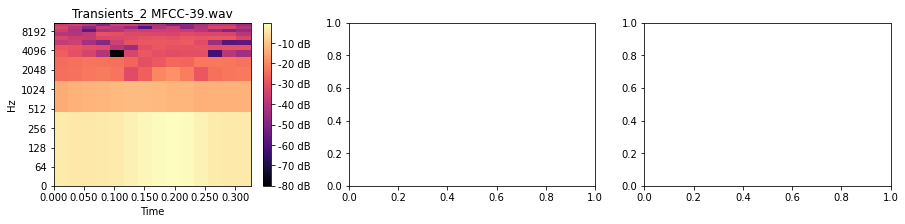

In [11]:
draw_specs(mfccs_2, 'mfcc', "Transients_2 MFCC-")

Here I have manually sorted the sounds by similarity according to how I perceived them. The sorting method that you wrote should be able to sort these sounds as well, into an order is similar to, or better than the order below.

In [12]:
# sorted_sound_files_2 = sort_sound_files(sound_files_2) # TODO: Uncomment and test
sorted_sound_files_2 = [    # TODO: Delete and sort sounds properly
    '../assets/transients_2/19.wav',
    '../assets/transients_2/23.wav',
    '../assets/transients_2/39.wav',
    '../assets/transients_2/5.wav',
    '../assets/transients_2/14.wav',
    '../assets/transients_2/15.wav',
    '../assets/transients_2/36.wav',
    '../assets/transients_2/24.wav',
    '../assets/transients_2/32.wav',
    '../assets/transients_2/13.wav',
    '../assets/transients_2/4.wav',
    '../assets/transients_2/30.wav',
    '../assets/transients_2/31.wav',
    '../assets/transients_2/29.wav',
    '../assets/transients_2/12.wav',
    '../assets/transients_2/26.wav',
    '../assets/transients_2/25.wav',
    '../assets/transients_2/7.wav',
    '../assets/transients_2/16.wav',
    '../assets/transients_2/33.wav',
    '../assets/transients_2/9.wav',
    '../assets/transients_2/34.wav',
    '../assets/transients_2/2.wav',
    '../assets/transients_2/1.wav',
    '../assets/transients_2/18.wav',
    '../assets/transients_2/28.wav',
    '../assets/transients_2/35.wav',
    '../assets/transients_2/21.wav',
    '../assets/transients_2/38.wav',
    '../assets/transients_2/17.wav',
    '../assets/transients_2/27.wav',
    '../assets/transients_2/10.wav',
    '../assets/transients_2/0.wav',
    '../assets/transients_2/6.wav',
    '../assets/transients_2/8.wav',
    '../assets/transients_2/3.wav',
    '../assets/transients_2/11.wav',
    '../assets/transients_2/22.wav',
    '../assets/transients_2/20.wav',
    '../assets/transients_2/37.wav',
]
mfccs_2 = get_mfccs(sorted_sound_files_2)

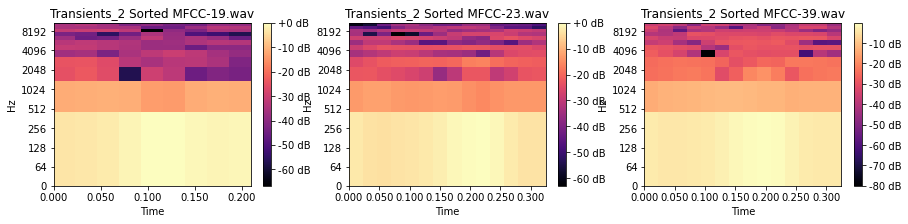

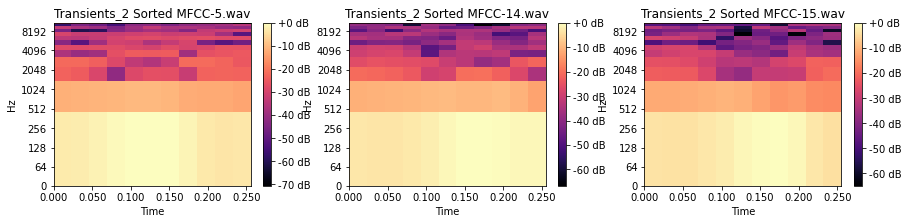

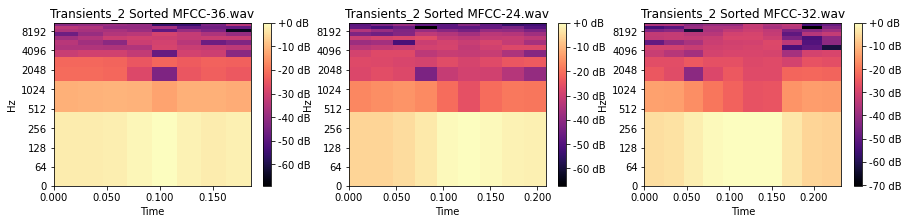

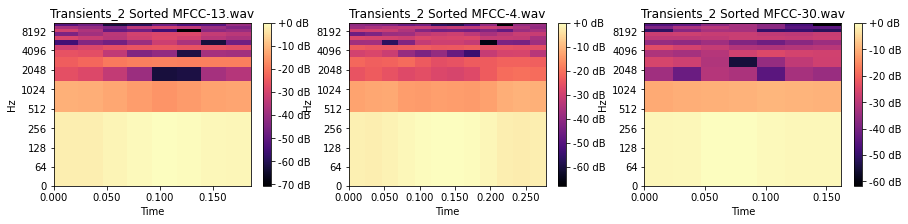

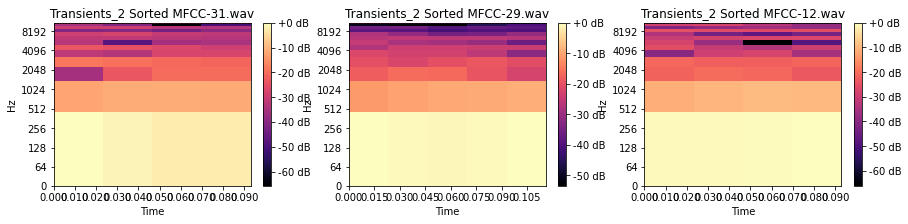

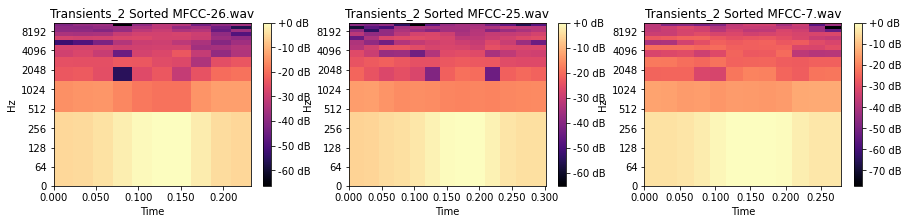

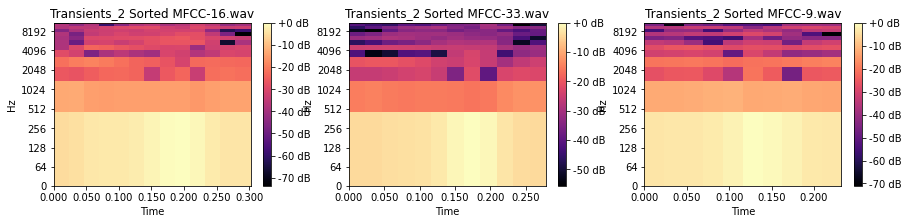

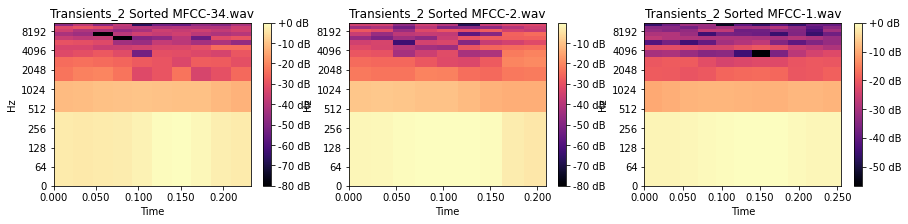

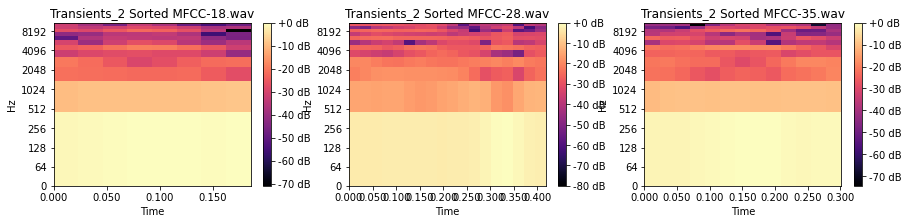

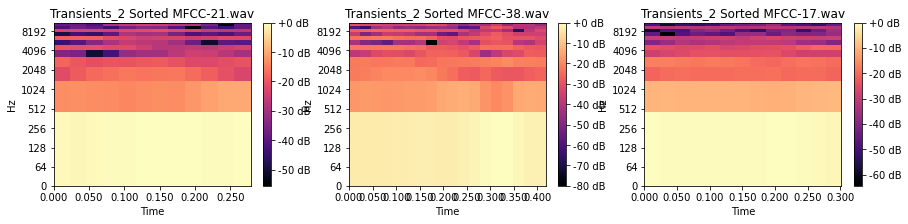

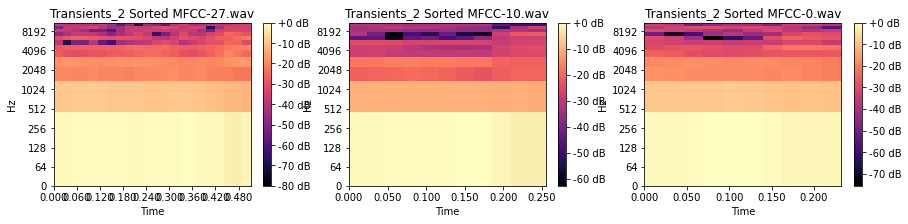

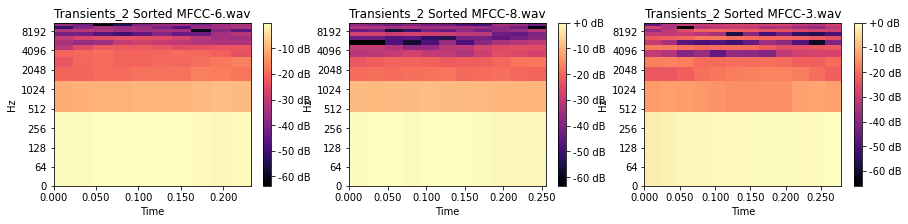

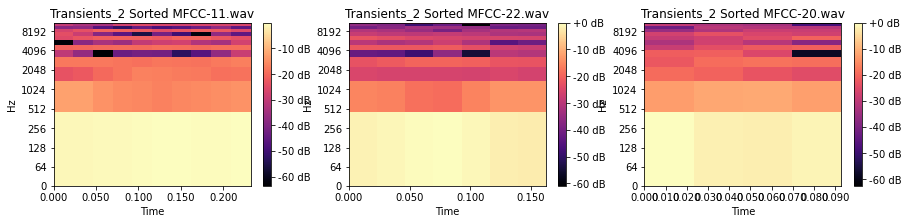

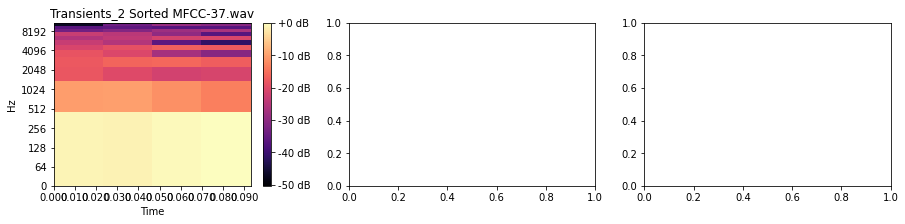

In [13]:
draw_specs(mfccs_2, 'mfcc', "Transients_2 Sorted MFCC-")